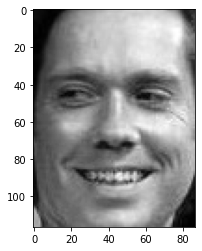

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


DATADIR = "E:\ANN\Gender\Training"

CATEGORIES = ["Male", "Female"]

for category in CATEGORIES:  # do male and female
    path = os.path.join(DATADIR,category)  # create path to male and female
    for img in os.listdir(path):  # iterate over each image per male and female
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just wane for now so break
    break  #...and one more!

In [3]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap='gray')
#plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do male and female

        path = os.path.join(DATADIR,category)  # create path to male and female
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=male 1=female

        for img in tqdm(os.listdir(path)):  # iterate over each image per male and female
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  
                pass
                  

In [5]:
create_training_data()

#print(len(training_data))
print(training_data[0])

random.shuffle(training_data) # shuffling the data



# for sample in training_data[:10]:
#     print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

100%|██████████| 23243/23243 [01:48<00:00, 213.62it/s]


[array([[141, 128, 114, ..., 117, 115, 124],
       [141, 130, 117, ..., 126, 119, 122],
       [142, 130, 120, ..., 140, 128, 124],
       ...,
       [131, 118, 103, ...,  79,  83,  89],
       [136, 128, 113, ...,  77,  85,  94],
       [138, 133, 120, ...,  78,  87,  98]], dtype=uint8), 1]


In [6]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

y=np.array(y)


X = X/255.0



In [8]:
model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

x = model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)


Epoch 1/3
2057/2057 [==============================] - 4139s 2s/step - loss: 0.2943 - accuracy: 0.8834 - val_loss: 0.2005 - val_accuracy: 0.9269
Epoch 2/3
2057/2057 [==============================] - 3839s 2s/step - loss: 0.1869 - accuracy: 0.9297 - val_loss: 0.1796 - val_accuracy: 0.9353
Epoch 3/3
2057/2057 [==============================] - 4004s 2s/step - loss: 0.1560 - accuracy: 0.9426 - val_loss: 0.1510 - val_accuracy: 0.9456


In [9]:

model.save('Gender.model')


INFO:tensorflow:Assets written to: Gender.model\assets


In [13]:
CATEGORIES = ["Male", "Female"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 100 
    #print(filepath)
    img=cv2.imread(filepath,cv2.COLOR_BGR2RGB)
    #plt.imshow(img,cmap=plt.cm.binary)
    #plt.show()
    img_array = cv2.imread(filepath,0) 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
    
model = tf.keras.models.load_model("Gender.model")



#Testing the Model

y_test=[]
y_actual=[]
for i in os.listdir("E:\\ANN\\Gender\\Validation\\female"):
    prediction = model.predict([prepare("E:\\ANN\\Gender\\Validation\\female\\"+i)])
    if CATEGORIES[int(prediction[0][0])] == 'Female':
        y_test.append(1)
    else:
        y_test.append(0)
    y_actual.append(1)

for i in os.listdir("E:\ANN\Gender\Validation\male"):
    prediction = model.predict([prepare("E:\ANN\Gender\Validation\male\\"+i)])
    if CATEGORIES[int(prediction[0][0])] == 'Female':
        y_test.append(1)
    else:
        y_test.append(0)
    y_actual.append(0)  

print(y_test)
print(y_actual)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 

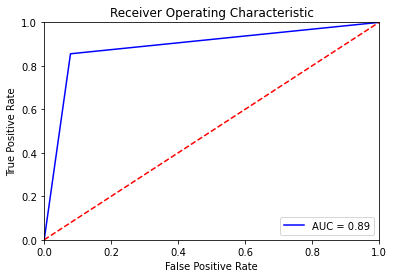

In [21]:
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict(X_test)
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_actual, y_test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

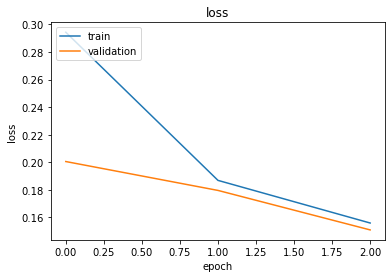

In [18]:
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show() 